In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!kaggle datasets download -d austinreese/usa-housing-listings -p "C:\Users\khami\Desktop\ML2 regression\data\raw" --unzip

Dataset URL: https://www.kaggle.com/datasets/austinreese/usa-housing-listings
License(s): CC0-1.0




  0%|          | 0.00/106M [00:00<?, ?B/s]
  1%|          | 1.00M/106M [00:00<01:38, 1.11MB/s]
  2%|1         | 2.00M/106M [00:01<00:48, 2.24MB/s]
  3%|2         | 3.00M/106M [00:01<00:34, 3.08MB/s]
  4%|3         | 4.00M/106M [00:01<00:27, 3.94MB/s]
  5%|4         | 5.00M/106M [00:01<00:22, 4.69MB/s]
  6%|5         | 6.00M/106M [00:01<00:20, 5.15MB/s]
  7%|6         | 7.00M/106M [00:02<00:27, 3.73MB/s]
  8%|7         | 8.00M/106M [00:02<00:22, 4.53MB/s]
  9%|8         | 9.00M/106M [00:02<00:19, 5.24MB/s]
  9%|9         | 10.0M/106M [00:02<00:18, 5.47MB/s]
 10%|#         | 11.0M/106M [00:02<00:17, 5.52MB/s]
 11%|#1        | 12.0M/106M [00:02<00:17, 5.58MB/s]
 12%|#2        | 13.0M/106M [00:03<00:20, 4.70MB/s]
 13%|#3        | 14.0M/106M [00:03<00:19, 4.93MB/s]
 14%|#4        | 15.0M/106M [00:03<00:17, 5.55MB/s]
 15%|#5        | 16.0M/106M [00:03<00:14, 6.46MB/s]
 16%|#6        | 17.0M/106M [00:03<00:14, 6.58MB/s]
 17%|#7        | 18.0M/106M [00:03<00:13, 6.87MB/s]
 18%|#7        | 19.

In [6]:
df = pd.read_csv(r"C:\Users\khami\Desktop\ML2 regression\data\raw\housing.csv")
df.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7049044568,https://reno.craigslist.org/apa/d/reno-beautif...,reno / tahoe,https://reno.craigslist.org,1148,apartment,1078,3,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/01616_daghmBUvTC...,Ridgeview by Vintage is where you will find al...,39.5483,-119.796,ca
1,7049047186,https://reno.craigslist.org/apa/d/reno-reduced...,reno / tahoe,https://reno.craigslist.org,1200,condo,1001,2,2.0,0,...,0,0,0,w/d hookups,carport,https://images.craigslist.org/00V0V_5va0MkgO9q...,Conveniently located in the middle town of Ren...,39.5026,-119.789,ca
2,7043634882,https://reno.craigslist.org/apa/d/sparks-state...,reno / tahoe,https://reno.craigslist.org,1813,apartment,1683,2,2.0,1,...,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00t0t_erYqC6LgB8...,2BD | 2BA | 1683SQFTDiscover exceptional servi...,39.6269,-119.708,ca
3,7049045324,https://reno.craigslist.org/apa/d/reno-1x1-fir...,reno / tahoe,https://reno.craigslist.org,1095,apartment,708,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00303_3HSJz75zlI...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,39.4477,-119.771,ca
4,7049043759,https://reno.craigslist.org/apa/d/reno-no-long...,reno / tahoe,https://reno.craigslist.org,289,apartment,250,0,1.0,1,...,1,0,1,laundry on site,NaN,https://images.craigslist.org/01616_fALAWFV8zQ...,"Move In Today: Reno Low-Cost, Clean & Furnishe...",39.5357,-119.805,ca


In [10]:
df.shape

(384977, 22)

In [12]:
df.dtypes

id                           int64
url                         object
region                      object
region_url                  object
price                        int64
type                        object
sqfeet                       int64
beds                         int64
baths                      float64
cats_allowed                 int64
dogs_allowed                 int64
smoking_allowed              int64
wheelchair_access            int64
electric_vehicle_charge      int64
comes_furnished              int64
laundry_options             object
parking_options             object
image_url                   object
description                 object
lat                        float64
long                       float64
state                       object
dtype: object

In [16]:
df.duplicated().sum()

0

In [18]:
df.describe()

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,3.849770e+05,3.849770e+05,3.849770e+05,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,383059.000000,383059.000000
mean,7.040982e+09,8.825722e+03,1.059900e+03,1.905345,1.480718,0.726890,0.707918,0.731771,0.082111,0.012871,0.048128,37.233487,-92.700631
std,8.800376e+06,4.462200e+06,1.915076e+04,3.494572,0.618061,0.445557,0.454721,0.443038,0.274535,0.112718,0.214036,5.546171,16.531980
min,7.003808e+09,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.533300,-163.894000
25%,7.035979e+09,8.050000e+02,7.500000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.454700,-100.775000
50%,7.043320e+09,1.036000e+03,9.490000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,37.647800,-87.745100
75%,7.048426e+09,1.395000e+03,1.150000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.138300,-81.179600
max,7.051292e+09,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.036000,172.633000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384977 entries, 0 to 384976
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       384977 non-null  int64  
 1   url                      384977 non-null  object 
 2   region                   384977 non-null  object 
 3   region_url               384977 non-null  object 
 4   price                    384977 non-null  int64  
 5   type                     384977 non-null  object 
 6   sqfeet                   384977 non-null  int64  
 7   beds                     384977 non-null  int64  
 8   baths                    384977 non-null  float64
 9   cats_allowed             384977 non-null  int64  
 10  dogs_allowed             384977 non-null  int64  
 11  smoking_allowed          384977 non-null  int64  
 12  wheelchair_access        384977 non-null  int64  
 13  electric_vehicle_charge  384977 non-null  int64  
 14  come

In [14]:
df.isnull().sum()

id                              0
url                             0
region                          0
region_url                      0
price                           0
type                            0
sqfeet                          0
beds                            0
baths                           0
cats_allowed                    0
dogs_allowed                    0
smoking_allowed                 0
wheelchair_access               0
electric_vehicle_charge         0
comes_furnished                 0
laundry_options             79026
parking_options            140687
image_url                       0
description                     2
lat                          1918
long                         1918
state                           0
dtype: int64

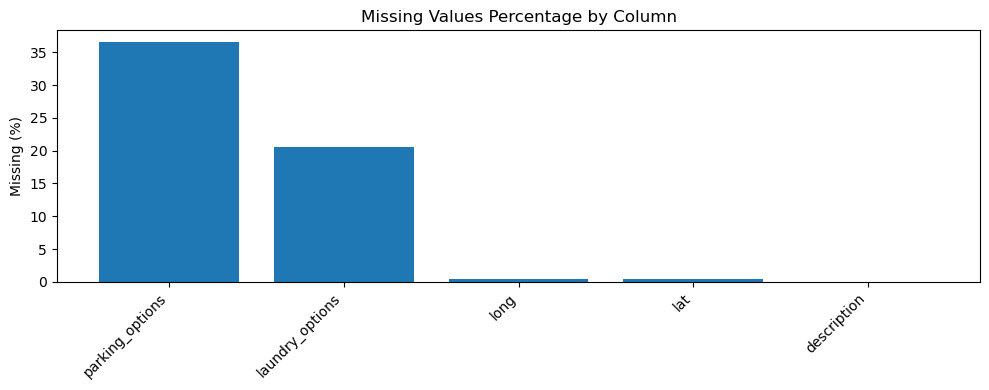

In [20]:
missing_pct = (df.isna().mean() * 100).sort_values(ascending=False)
missing_pct_nonzero = missing_pct[missing_pct > 0]

plt.figure(figsize=(10, 4))
plt.bar(missing_pct_nonzero.index, missing_pct_nonzero.values)
plt.title("Missing Values Percentage by Column")
plt.ylabel("Missing (%)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

<Axes: >

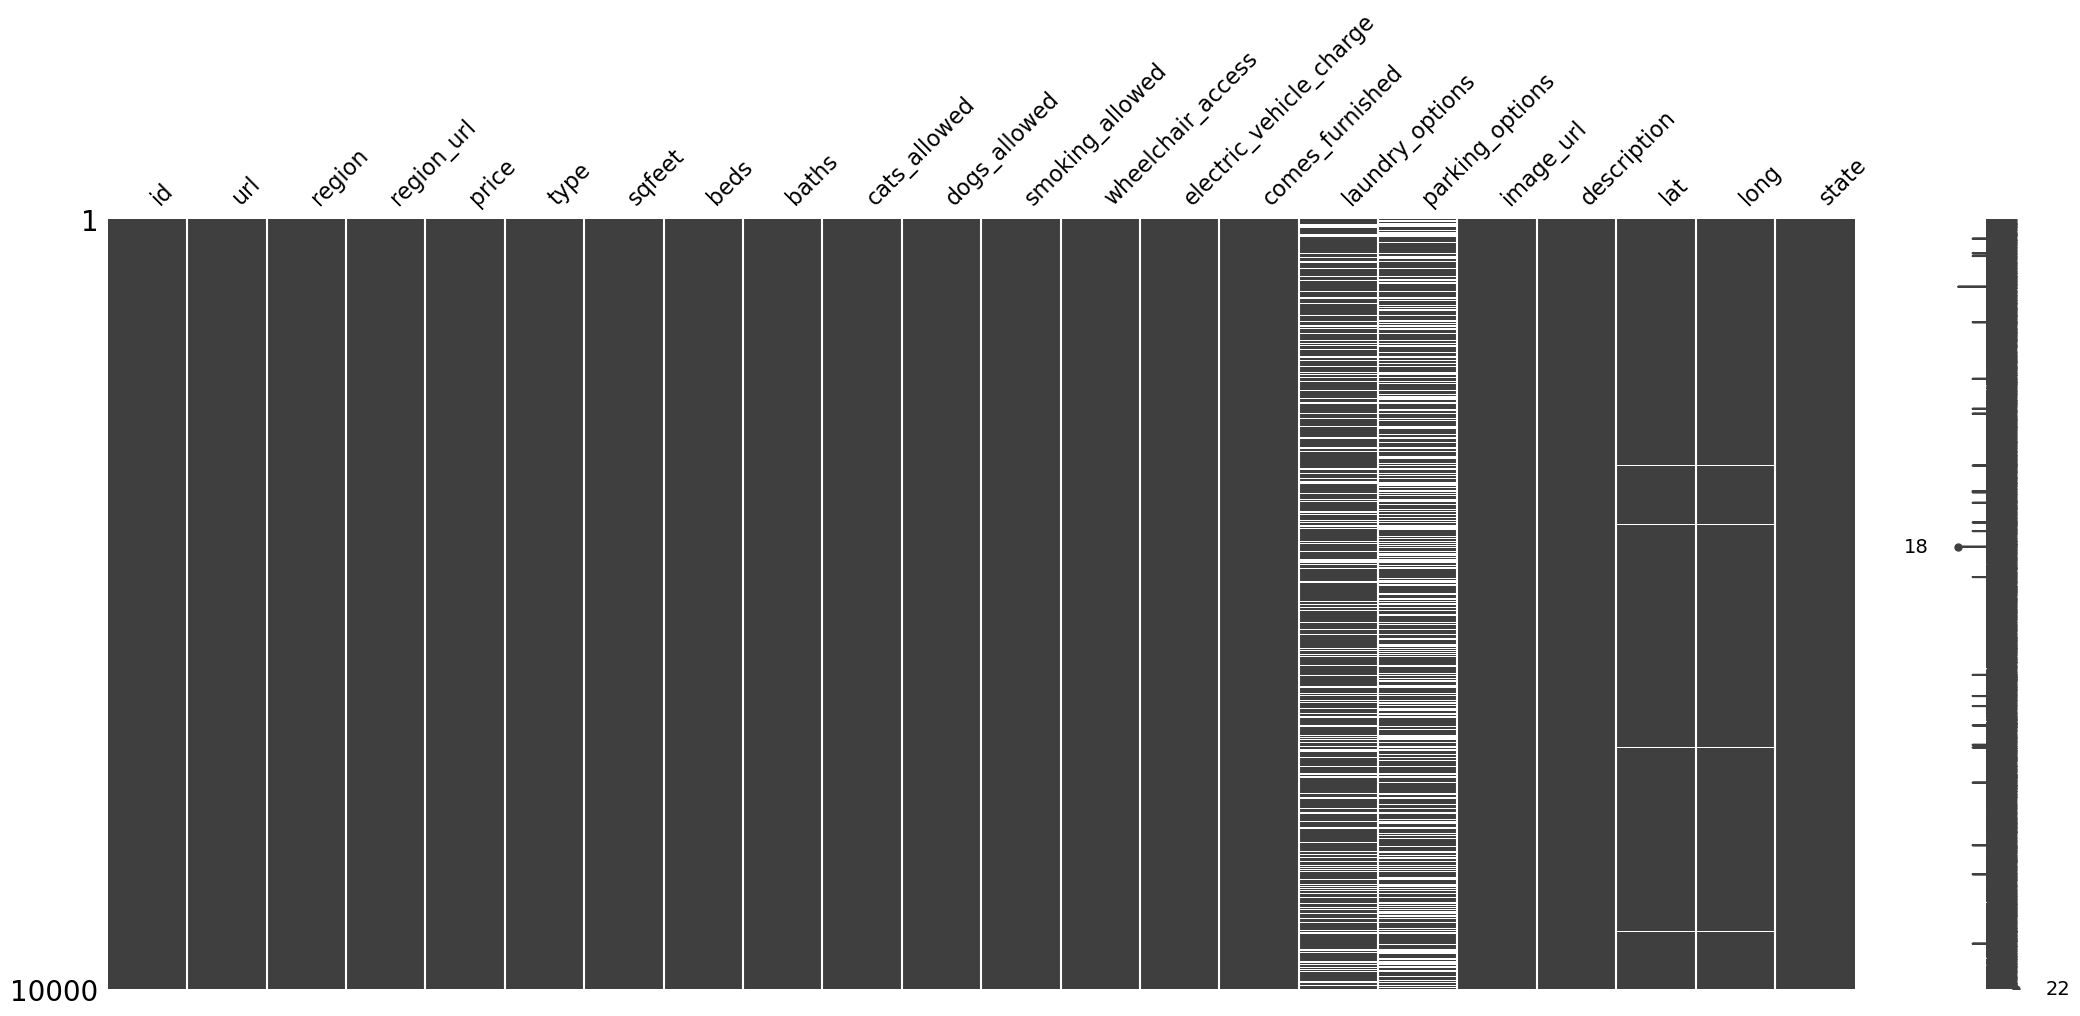

In [22]:
import missingno as msno
msno.matrix(df.sample(10000, random_state=42))

In [24]:
display(df.describe(include="number"))

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,3.849770e+05,3.849770e+05,3.849770e+05,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,384977.000000,383059.000000,383059.000000
mean,7.040982e+09,8.825722e+03,1.059900e+03,1.905345,1.480718,0.726890,0.707918,0.731771,0.082111,0.012871,0.048128,37.233487,-92.700631
std,8.800376e+06,4.462200e+06,1.915076e+04,3.494572,0.618061,0.445557,0.454721,0.443038,0.274535,0.112718,0.214036,5.546171,16.531980
min,7.003808e+09,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-43.533300,-163.894000
25%,7.035979e+09,8.050000e+02,7.500000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.454700,-100.775000
50%,7.043320e+09,1.036000e+03,9.490000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,37.647800,-87.745100
75%,7.048426e+09,1.395000e+03,1.150000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,41.138300,-81.179600
max,7.051292e+09,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.036000,172.633000


In [26]:
cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
print("\nCategorical columns:", cat_cols)

if cat_cols:
    display(df[cat_cols].head())


Categorical columns: ['url', 'region', 'region_url', 'type', 'laundry_options', 'parking_options', 'image_url', 'description', 'state']


,url,region,region_url,type,laundry_options,parking_options,image_url,description,state
0,https://reno.craigslist.org/apa/d/reno-beautif...,reno / tahoe,https://reno.craigslist.org,apartment,w/d in unit,carport,https://images.craigslist.org/01616_daghmBUvTC...,Ridgeview by Vintage is where you will find al...,ca
1,https://reno.craigslist.org/apa/d/reno-reduced...,reno / tahoe,https://reno.craigslist.org,condo,w/d hookups,carport,https://images.craigslist.org/00V0V_5va0MkgO9q...,Conveniently located in the middle town of Ren...,ca
2,https://reno.craigslist.org/apa/d/sparks-state...,reno / tahoe,https://reno.craigslist.org,apartment,w/d in unit,attached garage,https://images.craigslist.org/00t0t_erYqC6LgB8...,2BD | 2BA | 1683SQFTDiscover exceptional servi...,ca
3,https://reno.craigslist.org/apa/d/reno-1x1-fir...,reno / tahoe,https://reno.craigslist.org,apartment,w/d in unit,carport,https://images.craigslist.org/00303_3HSJz75zlI...,MOVE IN SPECIAL FREE WASHER/DRYER WITH 6 OR 12...,ca
4,https://reno.craigslist.org/apa/d/reno-no-long...,reno / tahoe,https://reno.craigslist.org,apartment,laundry on site,NaN,https://images.craigslist.org/01616_fALAWFV8zQ...,"Move In Today: Reno Low-Cost, Clean & Furnishe...",ca


In [28]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols].skew().sort_values(ascending=False)

price                      620.241559
sqfeet                     409.945299
beds                       282.238038
baths                       10.101872
electric_vehicle_charge      8.643395
comes_furnished              4.222419
wheelchair_access            3.044356
lat                          0.253839
long                        -0.045888
dogs_allowed                -0.914490
cats_allowed                -1.018461
smoking_allowed             -1.046286
id                          -1.097089
dtype: float64

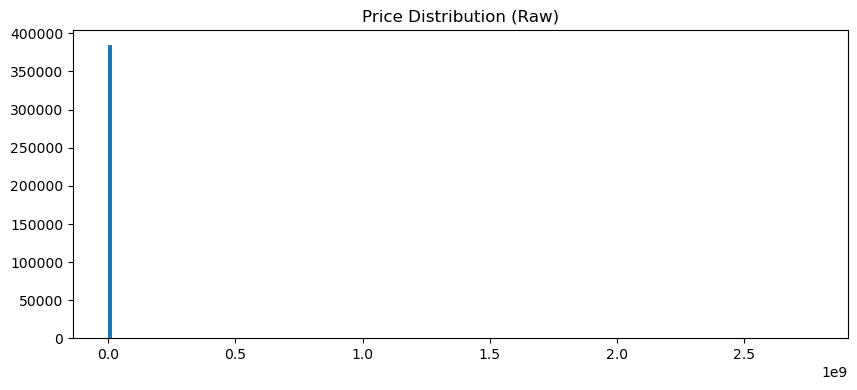

In [30]:
plt.figure(figsize=(10,4))
plt.hist(df["price"], bins=200)
plt.title("Price Distribution (Raw)")
plt.show()

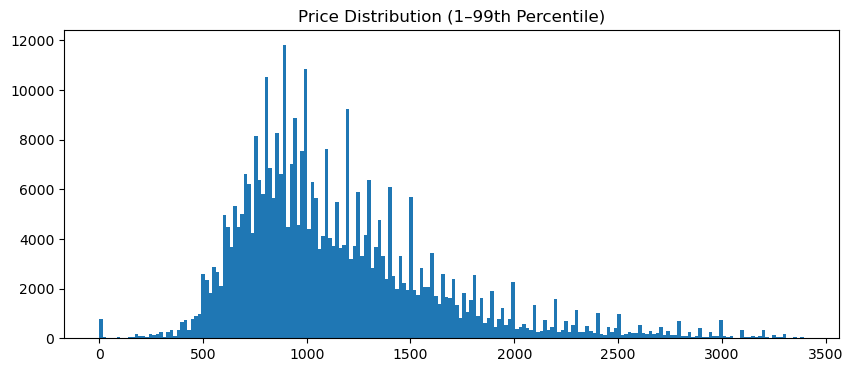

In [32]:
p99 = df["price"].quantile(0.99)

plt.figure(figsize=(10,4))
plt.hist(df.loc[df["price"].between(1, p99), "price"], bins=200)
plt.title("Price Distribution (1–99th Percentile)")
plt.show()

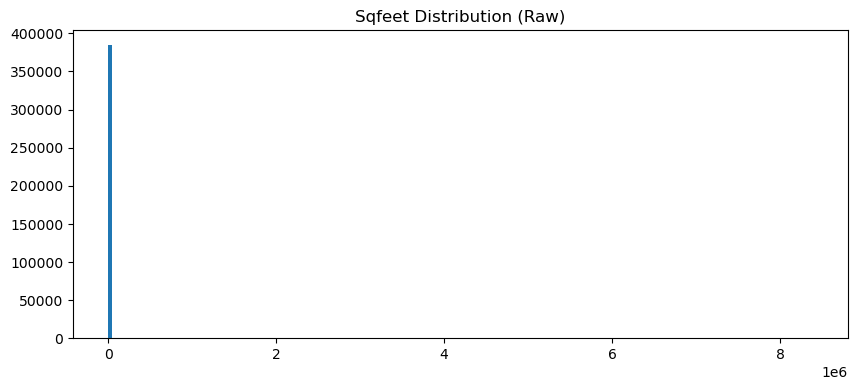

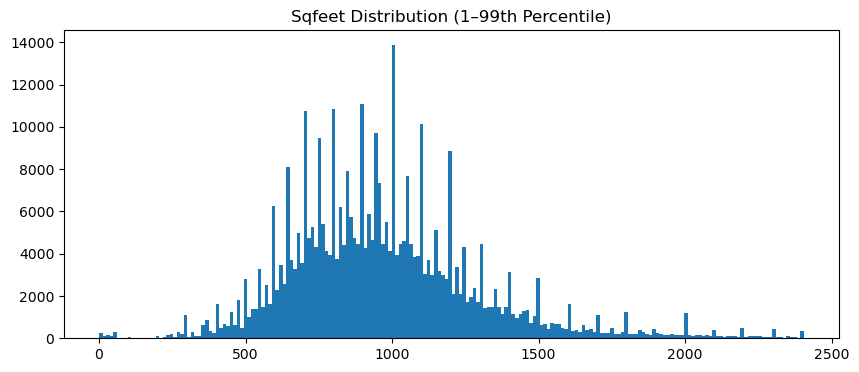

In [34]:
plt.figure(figsize=(10,4))
plt.hist(df["sqfeet"], bins=200)
plt.title("Sqfeet Distribution (Raw)")
plt.show()

s99 = df["sqfeet"].quantile(0.99)

plt.figure(figsize=(10,4))
plt.hist(df.loc[df["sqfeet"].between(1, s99), "sqfeet"], bins=200)
plt.title("Sqfeet Distribution (1–99th Percentile)")
plt.show()

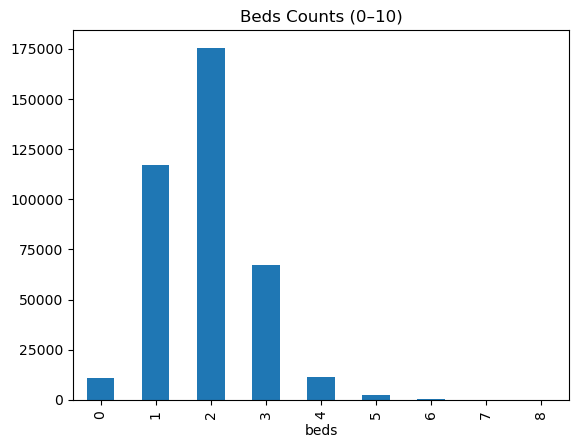

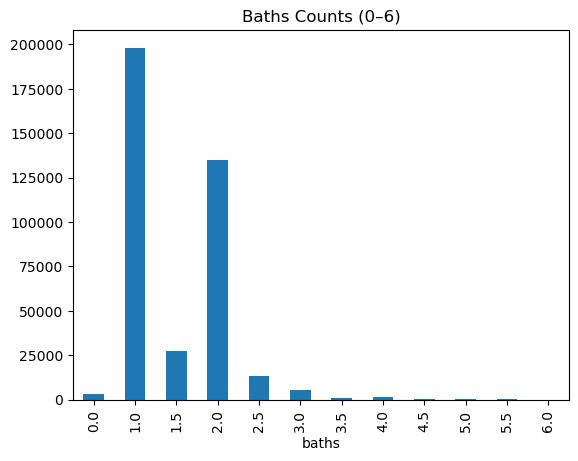

In [36]:
df["beds"].value_counts().sort_index().loc[0:10].plot(kind="bar")
plt.title("Beds Counts (0–10)")
plt.show()

df["baths"].value_counts().sort_index().loc[0:6].plot(kind="bar")
plt.title("Baths Counts (0–6)")
plt.show()

In [38]:
def q(s):
    return s.quantile([0, .001, .01, .05, .5, .95, .99, .999, 1])

for col in ["price", "sqfeet", "beds", "baths", "lat", "long"]:
    print(f"\n{col.upper()} quantiles:")
    print(q(df[col]))


PRICE quantiles:
0.000    0.000000e+00
0.001    0.000000e+00
0.010    3.440000e+02
0.050    5.660000e+02
0.500    1.036000e+03
0.950    2.260000e+03
0.990    3.395000e+03
0.999    7.365600e+03
1.000    2.768307e+09
Name: price, dtype: float64

SQFEET quantiles:
0.000          0.0
0.001         25.0
0.010        340.0
0.050        536.0
0.500        949.0
0.950       1642.0
0.990       2405.0
0.999       4200.0
1.000    8388607.0
Name: sqfeet, dtype: float64

BEDS quantiles:
0.000       0.0
0.001       0.0
0.010       0.0
0.050       1.0
0.500       2.0
0.950       3.0
0.990       4.0
0.999       5.0
1.000    1100.0
Name: beds, dtype: float64

BATHS quantiles:
0.000     0.0
0.001     0.0
0.010     1.0
0.050     1.0
0.500     1.0
0.950     2.5
0.990     3.0
0.999     4.5
1.000    75.0
Name: baths, dtype: float64

LAT quantiles:
0.000    -43.5333
0.001     21.2768
0.010     26.1718
0.050     28.1384
0.500     37.6478
0.950     45.5457
0.990     48.2038
0.999     61.5923
1.000    102.0360

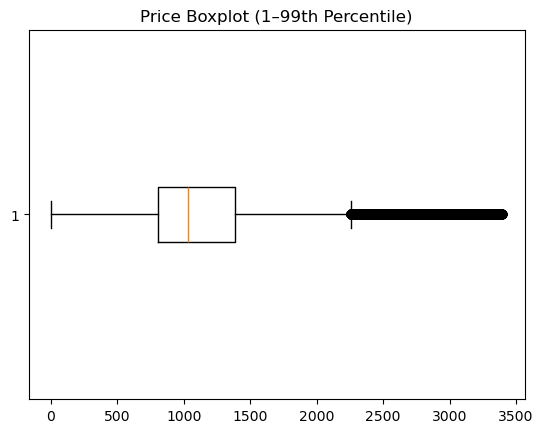

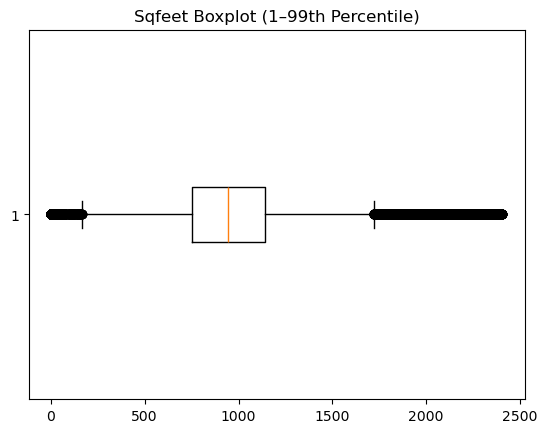

In [40]:
plt.boxplot(df.loc[df["price"].between(1, p99), "price"], vert=False)
plt.title("Price Boxplot (1–99th Percentile)")
plt.show()

plt.boxplot(df.loc[df["sqfeet"].between(1, s99), "sqfeet"], vert=False)
plt.title("Sqfeet Boxplot (1–99th Percentile)")
plt.show()

The dataset contains many structural errors → cleaning is essential

Target and sqfeet require transformation

Several columns must be dropped

Categorical encoding must be mixed (OHE + target encoding)

Outlier removal will significantly improve model performance

EDA Summary
In this EDA, we explored the USA Housing Listings dataset (≈385k rows, 22 columns) to understand data quality, distribution patterns, and issues that must be addressed before modeling.

What We Did
Loaded and inspected the dataset structure, types, and basic statistics

Checked missing values and identified columns with significant gaps

Examined numeric and categorical features

Analyzed the target variable distribution

Calculated skewness for all numeric features

Visualized key distributions (raw and trimmed)

Computed quantiles to detect invalid values and extreme outliers

What We Found
No duplicate rows, but several columns contain missing values (laundry_options, parking_options, lat, long)

Target variable price is extremely right‑skewed and contains invalid values (0 and unrealistic highs)

sqfeet, beds, and baths include impossible values (e.g., sqfeet in millions, beds=1100, baths=75)

Latitude and longitude include values outside the valid USA range

Many numeric features show heavy skewness, especially price and sqfeet

Several text-based columns (url, region_url, image_url, description) have high cardinality and are not useful for modeling

Key Conclusions for Preprocessing
Outlier removal is necessary for price, sqfeet, beds, baths, lat, and long

price and sqfeet require log1p transformation

Missing categorical values will be filled with "unknown"

High-cardinality text columns will be dropped

Mixed encoding strategy needed: one-hot for low-cardinality, target encoding for high-cardinality